**Name:** Bala Guga Gopal S

**Script Name:**   CIFAR 10 classification

**Script Description:** CLASSIFICATION OF CIFAR 10 Dataset

# Content

1. DATASET LOADING
2. Importing Required Libraries
3. DATASET TRAIN AND TEST SPLIT
4. MODEL CREATION
5. MODEL VIEW
6. TRAINING THE MODEL
7. ACCURACY AND VALIDATION PLOT
8. TESTING THE MODEL


#1. DATASET LOADING

In [2]:
# importing google drive to create the work space
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Configure Working directory to for Kaggle Json image (important to download the dataset from Kaggle to google drive via colab)
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Neuralnetworks /MiniPro/Dataset/kaggle"

In [4]:
train_data_root = ("/content/gdrive/MyDrive/CIFAR_10_image.zip (Unzipped Files)/CNN_CIFAR10_Image_Dataset_Mini/train")
valid_data_root = ("/content/gdrive/MyDrive/CIFAR_10_image.zip (Unzipped Files)/CNN_CIFAR10_Image_Dataset_Mini/test")
IMAGE_SHAPE = (32, 32) # (height, width) in no. of pixels
TRAINING_DATA_DIR = str(train_data_root)
VALIDATION_DATA_DIR = str(valid_data_root)
datagen_kwargs = dict(rescale=1./255, validation_split=.20) #Spliting of Data

#2. Importing Required Libraries

In [1]:
# Import tensorflow library and other dependencies
# Checking for GPU availability

import tensorflow as tf
import os
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from matplotlib import pyplot as plt
%matplotlib inline


import pandas as pd
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


#3. DATASET TRAIN AND TEST SPLIT


In [5]:
# loading the dataset images form the directory and splitting between , training and Validations
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(
                  VALIDATION_DATA_DIR,
                  subset="validation",
                  shuffle=True,
                  target_size=IMAGE_SHAPE
                  )

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_directory(
                  TRAINING_DATA_DIR,
                  subset="training",
                  shuffle=True,
                  target_size=IMAGE_SHAPE)

Found 120 images belonging to 10 classes.
Found 3840 images belonging to 10 classes.


In [6]:
# Iterating through the images and labels in train_generator

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 32, 32, 3), (32, 10))

In [7]:
class_name = train_generator.class_indices
class_names = train_generator.classes
print(class_names)
print(class_name)

[0 0 0 ... 9 9 9]
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [8]:
# dataset labels and Number of classes
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Airplane' 'Automobile' 'Bird' 'Cat' 'Deer' 'Dog' 'Frog' 'Horse' 'Ship'
 'Truck']


#4. MODEL CREATION


In [9]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
!pip install visualkeras

     |████████████████████████████████| 992 kB 5.1 MB/s 


In [11]:
learning_rate = 0.001
epochs = 30

opt = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=METRICS)

#5. MODEL VIEW

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       7

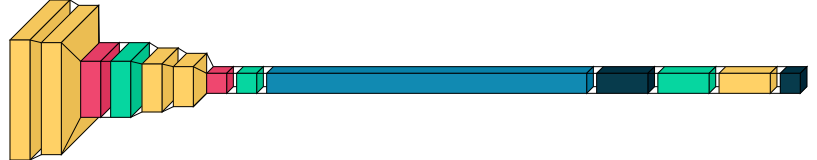

In [13]:
import visualkeras
visualkeras.layered_view(model) 

# 6. TRAINING THE MODEL

In [14]:
# Training the model with 30 epoch
BATCH_SIZE = valid_generator.batch_size
print("BATCH_SIZE :", BATCH_SIZE)
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

r = model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = valid_generator,
                    validation_steps= val_steps_per_epoch,
                    )

BATCH_SIZE : 32
Epoch 1/30
120/120 [==============================] - 796s 7s/step - loss: 2.5244 - accuracy: 0.2992 - precision: 0.3551 - recall: 0.2240 - val_loss: 2.9272 - val_accuracy: 0.1000 - val_precision: 0.1500 - val_recall: 0.1000
Epoch 2/30
120/120 [==============================] - 20s 163ms/step - loss: 1.7235 - accuracy: 0.4503 - precision: 0.5293 - recall: 0.3458 - val_loss: 4.1610 - val_accuracy: 0.1000 - val_precision: 0.1053 - val_recall: 0.1000
Epoch 3/30
120/120 [==============================] - 20s 162ms/step - loss: 1.3885 - accuracy: 0.5388 - precision: 0.6197 - recall: 0.4529 - val_loss: 5.9186 - val_accuracy: 0.1000 - val_precision: 0.1000 - val_recall: 0.1000
Epoch 4/30
120/120 [==============================] - 19s 161ms/step - loss: 1.0594 - accuracy: 0.6357 - precision: 0.7092 - recall: 0.5552 - val_loss: 2.5529 - val_accuracy: 0.2500 - val_precision: 0.3026 - val_recall: 0.1917
Epoch 5/30
120/120 [==============================] - 19s 162ms/step - loss: 0

#7. ACCURACY AND VALIDATION PLOT

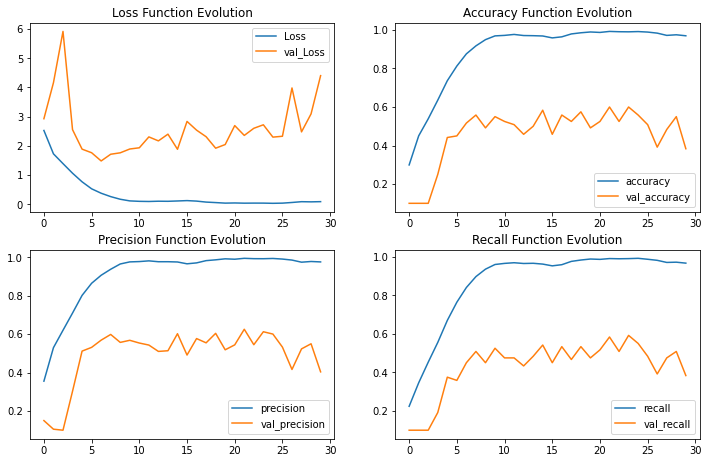

In [15]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

#8. TESTING THE MODEL

In [24]:
# Model evaluation and Final accuracy of the model from validation dataset.

val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
final_accuracy = model.evaluate(valid_generator)
#print("Final loss: {:.2f}".format(final_loss))
print(final_accuracy * 100)

4/4 [==============================] - 0s 69ms/step - loss: 4.4028 - accuracy: 0.3833 - precision: 0.4035 - recall: 0.3833
[4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867798, 0.38333332538604736, 4.4027581214904785, 0.38333332538604736, 0.4035087823867

In [26]:
#Model Predection from Val_batch

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 32, 32, 3)


In [27]:
tf_model_predictions = model.predict(val_image_batch)
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

Prediction results shape: (32, 10)


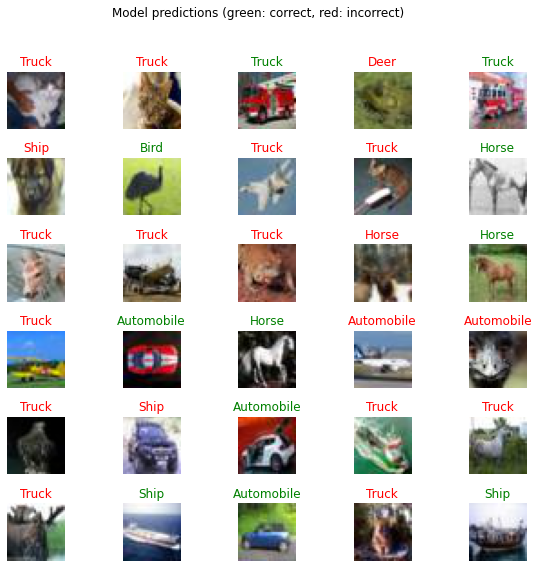

In [28]:

print("Prediction results shape:", tf_model_predictions.shape)
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

#Green colour shows correctly predicted images and the red colour shows mismatch from the dataset class directory. 

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = model.predict_generator(valid_generator, num_of_test_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

In [32]:
Y_pred = model.predict_generator(valid_generator, 30 )
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
cm = confusion_matrix(valid_generator.classes, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


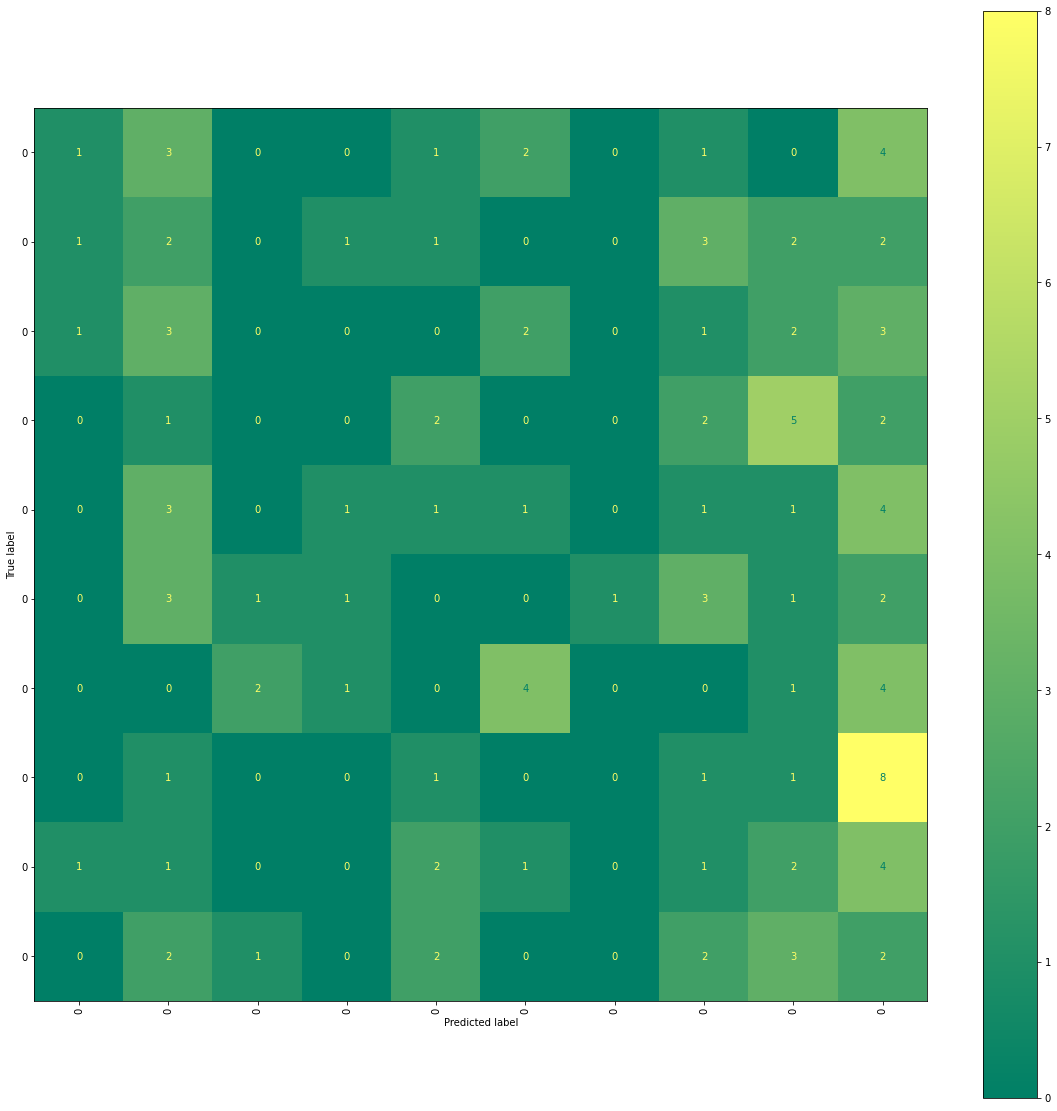

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=valid_generator.classes)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(20, 20))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [37]:
print(classification_report(valid_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.08      0.12        12
           1       0.11      0.17      0.13        12
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.10      0.08      0.09        12
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        12
           7       0.07      0.08      0.07        12
           8       0.11      0.17      0.13        12
           9       0.06      0.17      0.09        12

    accuracy                           0.07       120
   macro avg       0.07      0.07      0.06       120
weighted avg       0.07      0.07      0.06       120

